In this project, you will use regression to predict financial data for Enron employees and associates. Once you know some financial data about an employee, like their salary, what would you predict for the size of their bonus?

Run the starter code found in regression/finance_regression.py. This will draw a scatterplot, with all the data points drawn in. What target are you trying to predict? What is the input feature being used to predict it?

##### Answer: By looking at the code below, the target is bonus and the input is salary.

Mentally (or better yet, print out the scatterplot and use paper and pencil) sketch out the regression line that you roughly predict.

In [1]:
"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).
    Draws a little scatterplot of the training/testing data
    You fill in the regression code where indicated:
""" 

import pickle
import numpy as np

In [2]:
def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print "error: key ", feature, " not present"
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)

In [3]:
def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)
        return targets and features as separate lists
        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features

In [4]:
dictionary = pickle.load(open("../ud120-projects/final_project/final_project_dataset_modified.pkl", "r"))

List the features you want to look at--first time in the list will be the "target" feature

In [5]:
features_list = ["bonus", "salary"]

In [6]:
dictionary

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'

In [7]:
data = featureFormat(dictionary, features_list, remove_any_zeroes=True)

In [8]:
target, features = targetFeatureSplit(data)

In [9]:
from sklearn.cross_validation import train_test_split

/Users/alonavarshal/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, 
                                                                         random_state=42)

In [11]:
train_color ="b"
test_color = "r"

Regression code below. 

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression()
reg.fit(feature_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Scatterplot, with color-coded training and testing points

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

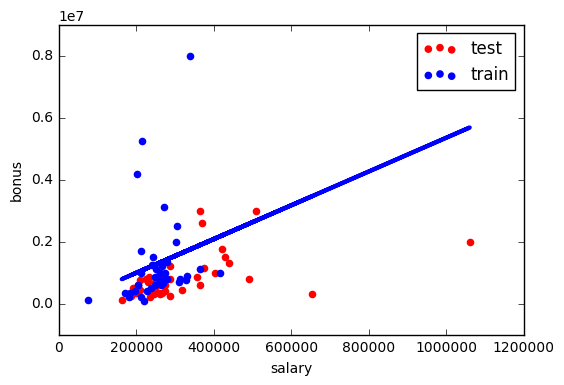

In [15]:
for feature, target in zip(feature_test, target_test):
    plt.scatter(feature, target, color=test_color)
for feature, target in zip(feature_train, target_train):
    plt.scatter(feature, target, color=train_color)
    
# labels for legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

# drawing the regression line:
try:
    plt.plot(feature_test, reg.predict(feature_test), linewidth=3)
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

Slope

In [16]:
reg.coef_

array([ 5.44814029])

Intercept

In [17]:
reg.intercept_

-102360.54329387983

In [18]:
reg.score(feature_test, target_test)

-1.4849924173685101

R score on the training data

In [19]:
reg.score(feature_train, target_train)

0.045509192699524359

#### Regressing Bonus against long term incentive

There are lots of finance features available, some of which might be more powerful than others in terms of predicting a person’s bonus. For example, suppose you thought about the data a bit and guess that the “long_term_incentive” feature, which is supposed to reward employees for contributing to the long-term health of the company, might be more closely related to a person’s bonus than their salary is.

A way to confirm that you’re right in this hypothesis is to regress the bonus against the long term incentive, and see if the regression score is significantly higher than regressing the bonus against the salary. Perform the regression of bonus against long term incentive--what’s the score on the test data?

In [20]:
features_list = ["bonus", "long_term_incentive"]

In [21]:
data = featureFormat(dictionary, features_list, remove_any_zeroes=True)

In [22]:
target, features = targetFeatureSplit(data)

In [23]:
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, 
                                                                         random_state=42)

In [24]:
reg = LinearRegression()
reg.fit(feature_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

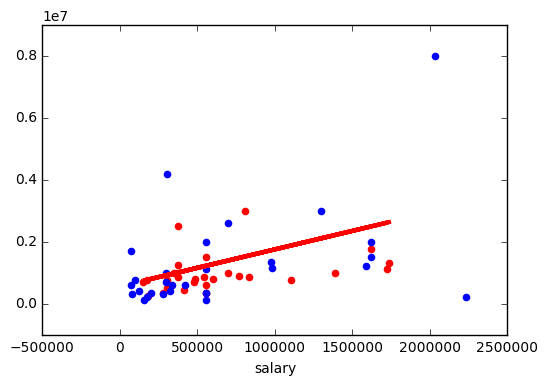

In [25]:
for feature, target in zip(feature_test, target_test):
    plt.scatter(feature, target, color=test_color)
for feature, target in zip(feature_train, target_train):
    plt.scatter(feature, target, color=train_color)
    
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, 
            label="train")
plt.plot(feature_test, reg.predict(feature_test), color='red', linewidth=3)
plt.xlabel('salary')
plt.show()

In [26]:
reg.coef_

array([ 1.19214699])

In [27]:
reg.intercept_

554478.75621500914

In [28]:
reg.score(feature_test, target_test)

-0.59271289994986431

In [29]:
reg.score(feature_train, target_train)

0.21708597125777662

--> Long term incentive is a better predictor of bonus

#### Sneak Peek: Outliers Break Regressions

This is a sneak peek of the next lesson, on outlier identification and removal. Go back to a setup where you are using the salary to predict the bonus, and rerun the code to remind yourself of what the data look like. You might notice a few data points that fall outside the main trend, someone who gets a high salary (over a million dollars!) but a relatively small bonus. This is an example of an outlier, and we’ll spend lots of time on them in the next lesson.

A point like this can have a big effect on a regression: if it falls in the training set, it can have a significant effect on the slope/intercept if it falls in the test set, it can make the score much lower than it would otherwise be. As things stand right now, this point falls into the test set (and probably hurting the score on our test data as a result). Let’s add a little hack to see what happens if it falls in the training set instead. Add these two lines near the bottom of finance_regression.py, right before plt.xlabel(features_list[1]):

```
reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b") 
```
Now we’ll be drawing two regression lines, one fit on the test data (with outlier) and one fit on the training data (no outlier). Look at the plot now--big difference, huh? That single outlier is driving most of the difference. What’s the slope of the new regression line?

(That’s a big difference, and it’s mostly driven by the outliers. The next lesson will dig into outliers in more detail so you have tools to detect and deal with them.)

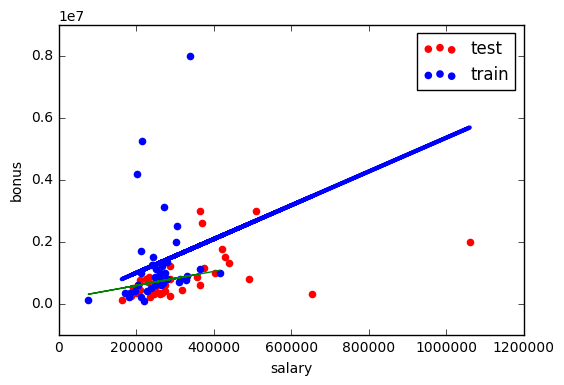

In [20]:
for feature, target in zip(feature_test, target_test):
    plt.scatter(feature, target, color=test_color)
for feature, target in zip(feature_train, target_train):
    plt.scatter(feature, target, color=train_color)
    
# labels for legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

# drawing the regression line:
try:
    plt.plot(feature_test, reg.predict(feature_test), linewidth=3)
except NameError:
    pass

reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="g")

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [21]:
reg.coef_

array([ 2.27410114])

--> Compare that to 5.49 above for the other case

In [22]:
reg.intercept_

124444.38886605436

In [23]:
reg.score(feature_test, target_test)

0.251488150398397

In [24]:
reg.score(feature_train, target_train)

-0.12359798540343814